In [3]:
# Ingest the data first

In [4]:
import pandas as pd

In [80]:
data = pd.read_csv(r"D:\\Lang\\Projects\\Diamond_price_prediction\\notebooks\\data\\Gemstone.csv")

In [6]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [8]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
57147,57147,0.51,Premium,E,SI2,61.6,58.0,5.13,5.18,3.18,1250
112505,112505,0.70,Ideal,E,VS1,61.1,55.0,5.74,5.77,3.51,2792
126888,126888,0.90,Good,F,SI2,63.9,59.0,6.05,6.09,3.88,3429
191884,191884,0.51,Ideal,F,VS1,62.2,55.0,5.13,5.16,3.20,1657
118768,118768,0.31,Ideal,G,VS2,62.0,53.0,4.34,4.38,2.70,562


In [9]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [84]:
data = data.drop(columns="id")

In [11]:
data.shape

(193573, 10)

In [12]:
# Divide data into numerical and categorical 

In [13]:
categorical_column = data.columns[data.dtypes == "object"]

In [14]:
numrical_column = data.columns[data.dtypes != "object"]

In [15]:
data[categorical_column].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [16]:
data[numrical_column].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [22]:
data[categorical_column]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [24]:
data[categorical_column]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [26]:
data[categorical_column]["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [ ]:
# Now analyze data using various plots

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

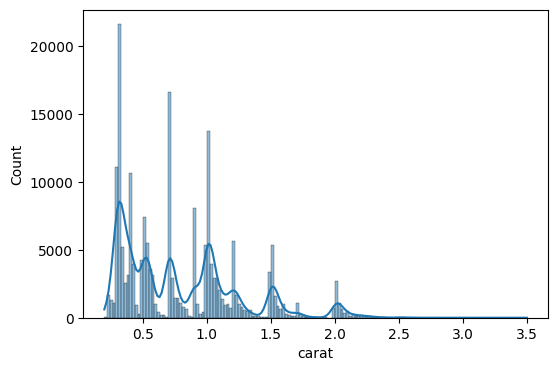

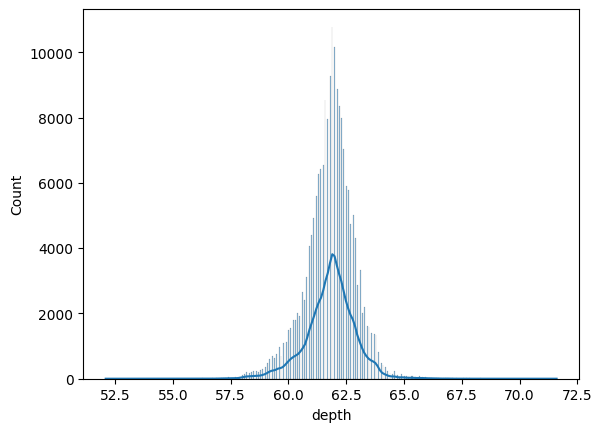

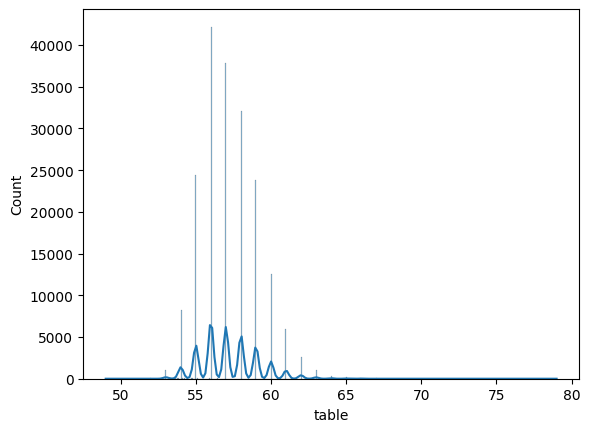

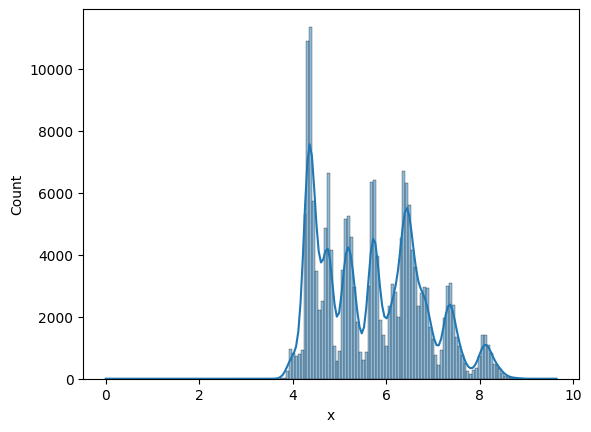

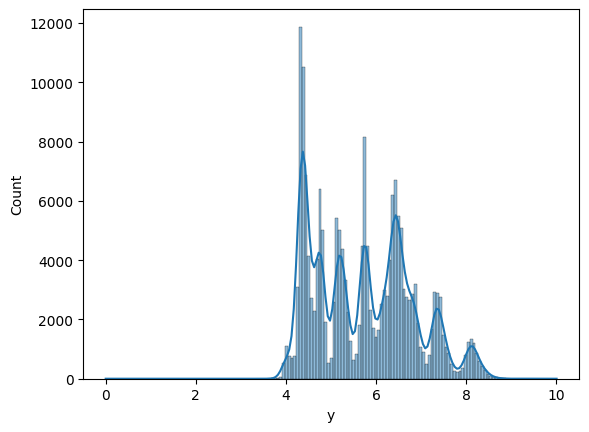

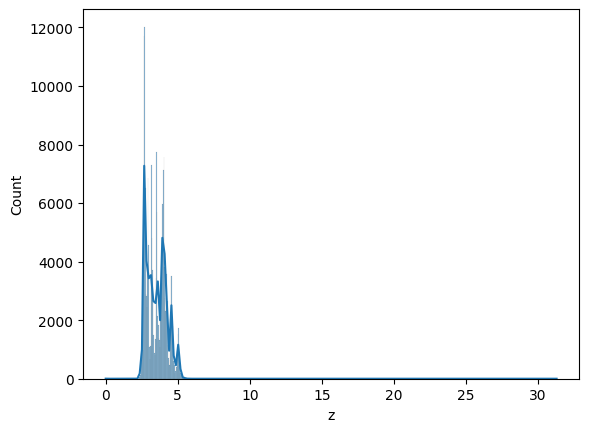

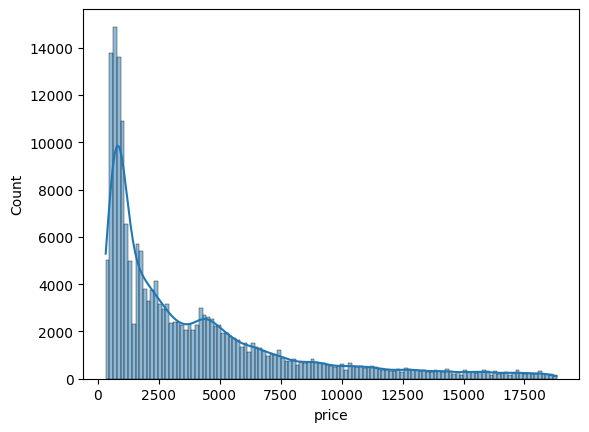

In [29]:
plt.figure(figsize=(6,4))
for col in numrical_column:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()    
    

<Axes: xlabel='depth', ylabel='Density'>

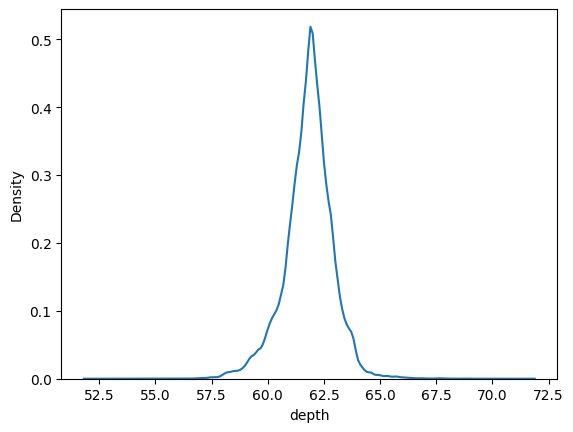

In [30]:
sns.kdeplot(data=data,x=data["depth"])

In [34]:
# now analyze categorical column

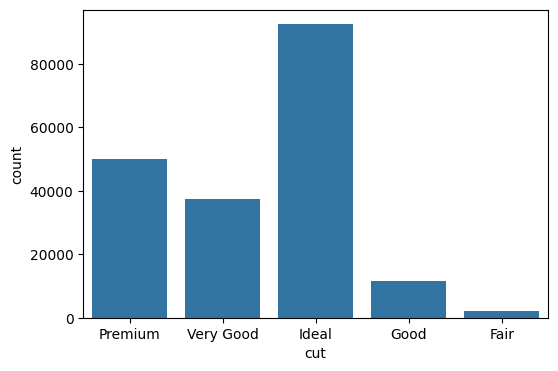

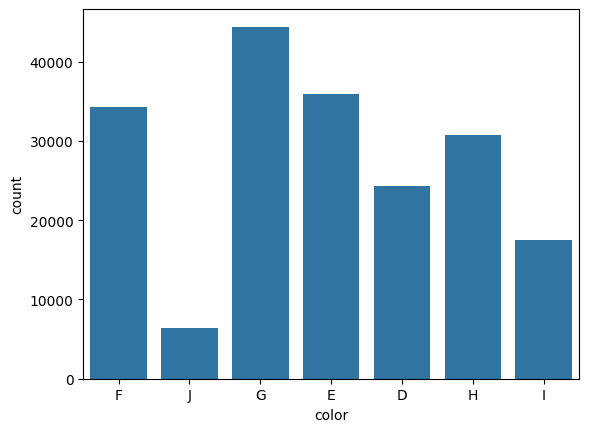

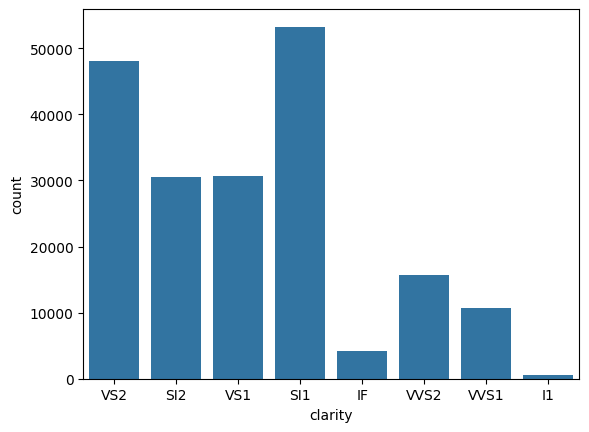

In [44]:
plt.figure(figsize=(6,4))
for col in categorical_column:
    sns.countplot(x=data[col])
    print("\n")
    plt.show()

<Axes: xlabel='clarity'>

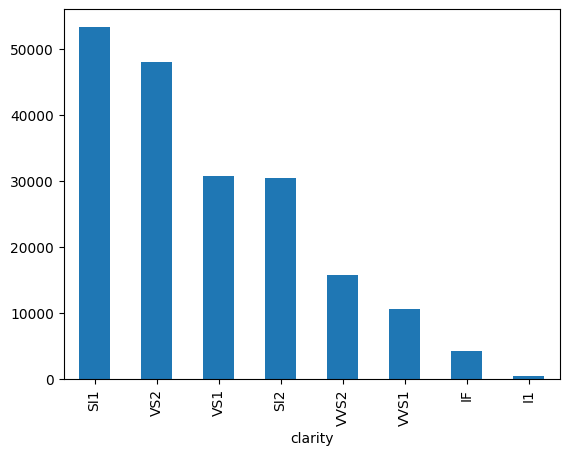

In [43]:
data["clarity"].value_counts().plot(kind="bar")

In [50]:
# Check the relationship of features using heatmap

<Axes: >

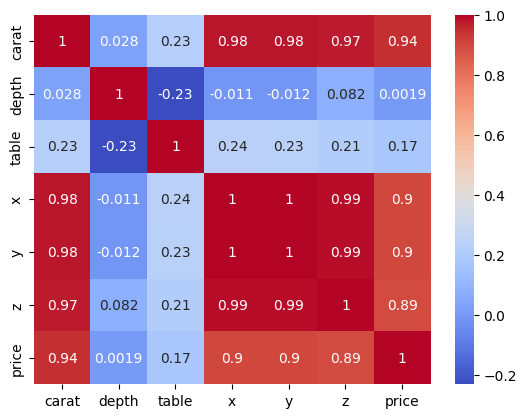

In [53]:
sns.heatmap(data[numrical_column].corr(),annot=True,cmap="coolwarm")

In [55]:
# Feature engineering 

In [56]:
# we need to do ordinal encoding on clarity,color,cut

In [58]:
# First of all see all nunique values in each column

In [68]:
data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [69]:
data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [70]:
data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [81]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [82]:
data["cut"] = data["cut"].map(cut_map)
data["clarity"] = data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object